<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/HalloweenCandy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HALLOWEEN CANDY WINPERCENT PREDICTION**

# **1. Introduction**


**Your client for this project is a Candy Selling Company...**


*  This company sells a large variety of candies worldwide..
*  They want to supply the highest quality of candies which most people will prefer to receive on halloween.
*  To find the most popular candy, they need to analyze different characteristics of the candy as per the data collected through the survey.

**Current Scenario:**

* It is very tough to know the candies preferred by people to receive on Halloween.

* Currently, they estimate the popularity of candies based on their previous sales but this does not give the ideal results.






# **2. Problem Statement**
**The current process suffers from the following problems:**

*   The popularity of candies derived from the previous sales records is not an ideal estimate of actual popularity.
*   The sales can also be affected by bulk orders as well and this might not give us the actual popularity.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*  You are given a dataset containing 85 different candies and their characteristics in form of features.
*  Your task is to build a **REGRESSION** model using the dataset.
*  Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


# **4. Data Acquisition & Description**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Halloween-Candy/candy_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Halloween-Candy/candy_test.csv")
dataValidationId=dataValidation.competitorname
data.head()



,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
1,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
2,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
3,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
4,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    68 non-null     object 
 1   chocolate         68 non-null     int64  
 2   fruity            68 non-null     int64  
 3   caramel           68 non-null     int64  
 4   peanutyalmondy    68 non-null     int64  
 5   nougat            68 non-null     int64  
 6   crispedricewafer  68 non-null     int64  
 7   hard              68 non-null     int64  
 8   bar               68 non-null     int64  
 9   pluribus          68 non-null     int64  
 10  sugarpercent      68 non-null     float64
 11  pricepercent      68 non-null     float64
 12  winpercent        68 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 7.0+ KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.455882,0.441176,0.191176,0.191176,0.102941,0.102941,0.147059,0.294118,0.485294,0.474632,0.496603,51.531087
std,0.501753,0.500219,0.396151,0.396151,0.306141,0.306141,0.356798,0.459033,0.503500,0.278968,0.285002,14.768819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.034000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.276000,40.810833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465000,0.511000,51.344505
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.732000,0.767000,62.484646
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,81.866257


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


**Check null value or any other inconsistent value in column**

In [7]:
print((data=="").sum(), "\n")

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64 



In [8]:
print(data.isna().sum(), "\n")


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64 



In [9]:
print((data=="Unknown").sum(), "\n")


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64 



In [10]:
print((data==0).sum(), "\n")

competitorname       0
chocolate           37
fruity              38
caramel             55
peanutyalmondy      55
nougat              61
crispedricewafer    61
hard                58
bar                 48
pluribus            35
sugarpercent         0
pricepercent         0
winpercent           0
dtype: int64 



In [37]:
data.fruity.value_counts()

0    38
1    30
Name: fruity, dtype: int64

In [11]:
data.duplicated().any()

False

In [12]:
catCol=["competitorname"]
for col in catCol:
  print(data[col].value_counts())



Sugar Daddy            1
Baby Ruth              1
Strawberry bon bons    1
Trolli Sour Bites      1
Twizzlers              1
                      ..
Whoppers               1
Root Beer Barrels      1
Peanut butter M&MÕs    1
Milky Way Midnight     1
Nestle Smarties        1
Name: competitorname, Length: 68, dtype: int64


### **5.2 Data Cleaning**

- N/A

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

In [13]:
data.describe().columns


Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

### **Check distribution of numerical features and Outliers**

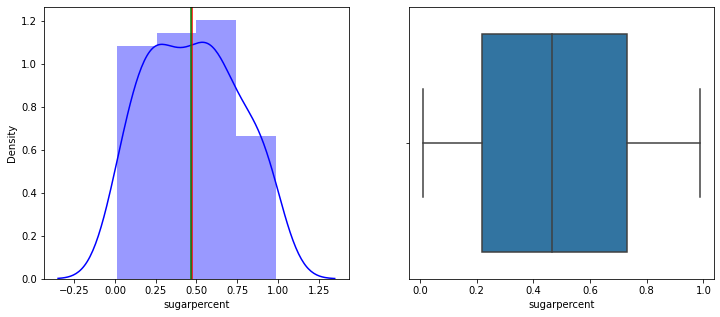

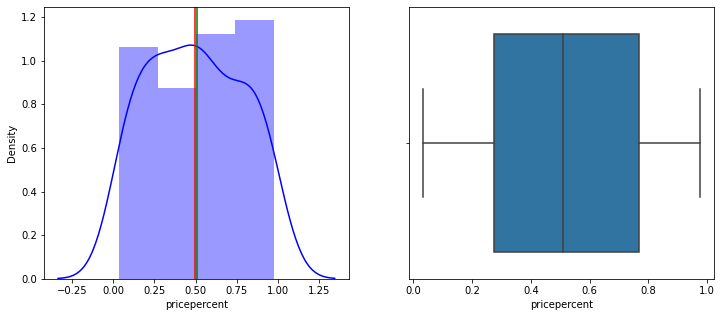

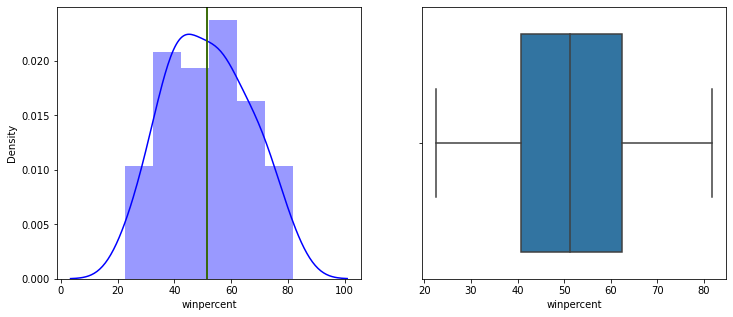

In [14]:
contColumn=data.describe().columns[-3:]


for col in contColumn:  
  fig=plt.figure(figsize=[12,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])


  

### **Checking relationship between cont features and target variable**

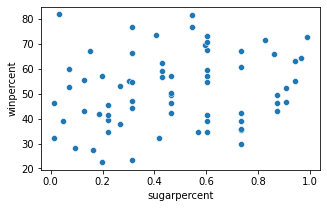

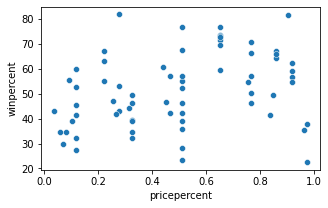

In [23]:
for col in contColumn[:-1]:
  fig=plt.figure(figsize=[5,3])
  sns.scatterplot(x=col,y="winpercent",data=data)

### **Checking relationship between cat features and target variable**

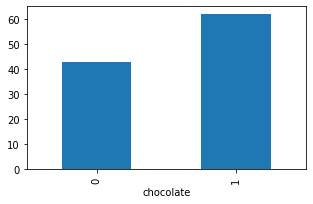

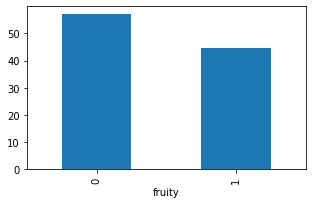

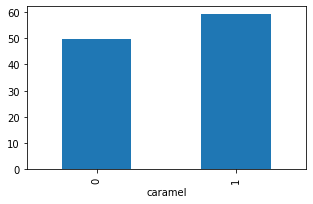

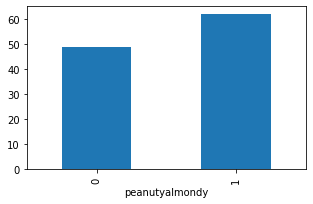

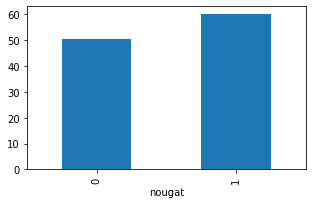

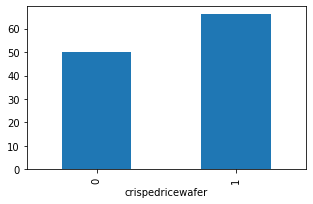

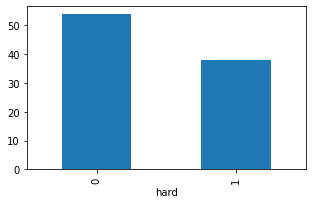

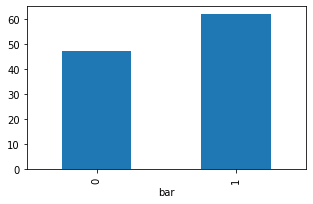

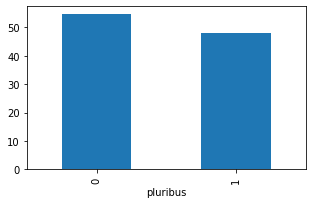

In [16]:
catColumn=data.describe().columns[0:9]
for col in catColumn:
  fig=plt.figure(figsize=[5,3])
  data.groupby(col)["winpercent"].mean().plot.bar()



### **Correlation Matrix**

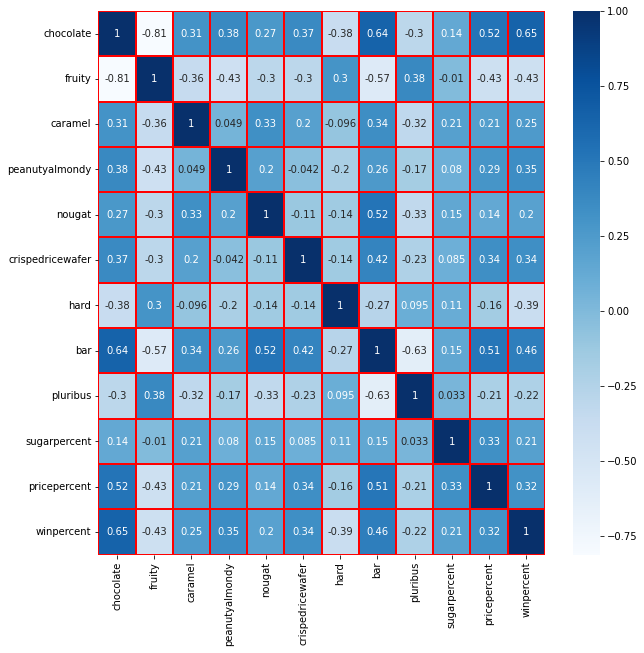

In [17]:
figure=plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation/Feature Selection**



In [18]:
features=data.describe().columns[:-1]
features

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent'],
      dtype='object')

In [19]:
X=data[features]
y=data.winpercent
dataValidation=dataValidation[features]


# **8. Model Development & Evaluation**

### **With PipeLine**

In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

max_depth=7
modelList=[LinearRegression(),DecisionTreeRegressor(max_depth=max_depth),
           RandomForestRegressor(random_state=47,max_depth=max_depth),KNeighborsRegressor(n_neighbors=8)]


# columns_to_scale=contColumn
kf=KFold(10,shuffle=True,random_state=47)
# Instantiate column transformer
# column_trans=make_column_transformer((OneHotEncoder(drop="first"),columns_to_encode),(RobustScaler(),columns_to_scale),remainder="passthrough")
cv_score_df=pd.DataFrame(columns=["Model","Train Score","Test Score","FitDiff"])
  # print(cv_score_df)
i=0
for model in modelList:
  cv_score=cross_validate(model,X,y,cv=kf,n_jobs=-1,scoring=("neg_root_mean_squared_error"),return_train_score=True)
  cv_score_df.loc[i]=[model,cv_score["train_score"].mean(),cv_score["test_score"].mean(),cv_score["train_score"].mean()-cv_score["test_score"].mean()]
  i=i+1
print(cv_score_df)
# pipe=make_pipeline(column_trans,modelList[2])
# pipe.fit(X,y)



                                               Model  Train Score  Test Score  \
0                                 LinearRegression()    -9.815234  -12.174080   
1                 DecisionTreeRegressor(max_depth=7)    -5.030194  -13.049594   
2  RandomForestRegressor(max_depth=7, random_stat...    -5.360139  -11.314185   
3                 KNeighborsRegressor(n_neighbors=8)   -10.539146  -11.507644   

    FitDiff  
0  2.358846  
1  8.019400  
2  5.954046  
3  0.968498  


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

max_depth=5
modelList=[LinearRegression(),DecisionTreeRegressor(max_depth=max_depth),
           RandomForestRegressor(random_state=42,max_depth=max_depth),KNeighborsRegressor(n_neighbors=8)]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25,random_state=47)
cv_score_df=pd.DataFrame(columns=["Model","Train Score","Test Score","FitDiff"])
i=0
for model in modelList:
  model.fit(X_train,y_train)
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)
  rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
  mse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
  rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
  cv_score_df.loc[i]=[model,rmse_train,rmse_test,rmse_train-rmse_test]
  i=i+1
cv_score_df



,Model,Train Score,Test Score,FitDiff
0,LinearRegression(),9.835310,11.885135,-2.049826
1,DecisionTreeRegressor(max_depth=5),6.731568,10.974423,-4.242855
2,"(DecisionTreeRegressor(max_depth=5, max_featur...",5.954669,11.241525,-5.286856
3,KNeighborsRegressor(n_neighbors=8),10.486097,12.279457,-1.793359


In [40]:
param_list={
            "criterion" : ["squared_error", "absolute_error", "poisson"],
            "max_depth" : [None,2,3,4,5,6],
           "min_samples_leaf":[1,2,3,4,5],
          #  "min_samples_split" :[2,3,4,5],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50]
            }

from sklearn.model_selection import RandomizedSearchCV
randCV=RandomizedSearchCV(RandomForestRegressor(),param_list,scoring="neg_root_mean_squared_error",cv=kf,n_jobs=-1,return_train_score=True)
randCV.fit(X_train,y_train)
y_train_pred=randCV.predict(X_train)
y_test_pred=randCV.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
print(rmse_train)
print(rmse_test)

6.880545589871207
11.628757479685


# **9. Dump Model using Pickle**

In [43]:
import pickle
# model=RandomForestClassifier(random_state=47,max_depth=max_depth)
# model.fit(X,y)
##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/halloween_model.pkl", 'wb') as f_out:
    pickle.dump(randCV, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [45]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/halloween_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

[48.21800574 38.01561267 42.54744241 60.06312773 43.95409307 42.98083387
 48.06702713 45.47066715 62.84315545 61.01657453 43.64848926 38.40407625
 46.12885532 61.73758966 69.40610663 44.17368902 42.57923354]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>